In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

base_path = "/g/stegle"

In [28]:
def plot_vars_from_df(df, variables, xlim = [], ylim = [], title = ''):
    plt.figure()

    for variable in variables:
        df_plot = df[df["variable"] == variable]
        plt.plot( df_plot["epoch"], df_plot["value"], label = variable)
        
    if len(xlim) == 2:
        plt.xlim(xlim)
    if len(ylim) == 2:
        plt.ylim(ylim)
    if len(title) > 0:
        plt.title(title)

    plt.legend()    
    plt.show()

In [29]:
log_path = "ueltzhoe/bicycle/notebooks/experiments/synthetic/plots/LATENT_SYNTHETIC_pretrain_epochs10000synthetic_T1.0_GRAD-CLIP_SIM:Cas9INF:Cas9-slow_lr_erdos-renyi_random-uniform_False_4096_True_0_1_0.001_10_1.0_1.0_0.0_1.0_1.0_250/last_log_train.csv"
df = pd.read_csv(os.path.join(base_path,log_path))

In [30]:
df.variable.unique()

array(['train_kl_train', 'train_nll_train', 'train_sigma_min',
       'train_alpha_min', 'train_alpha_max', 'train_kl_valid',
       'train_nll_valid', 'train_kl_test', 'train_nll_test', 'train_loss',
       'train_l1', 'train_T', 'train_lyapunov'], dtype=object)

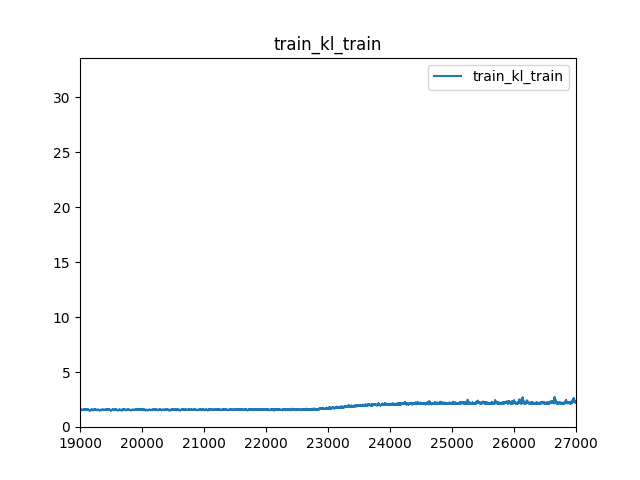

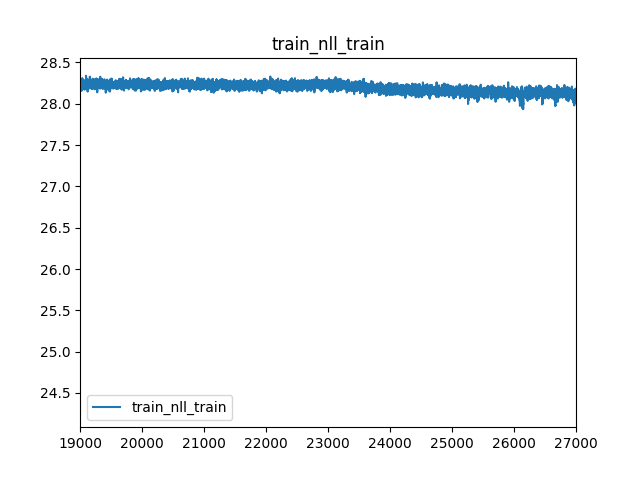

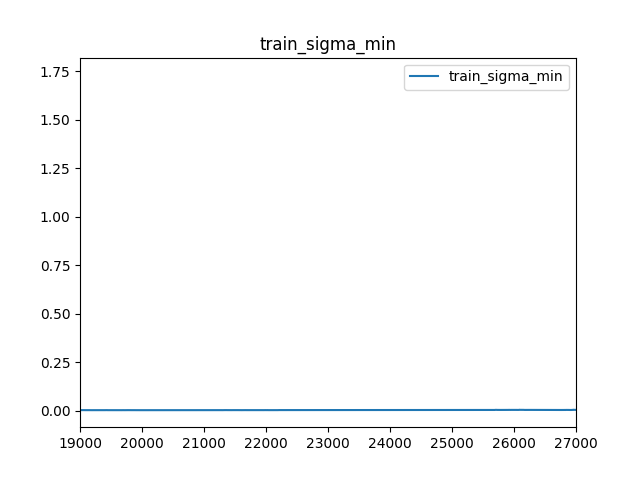

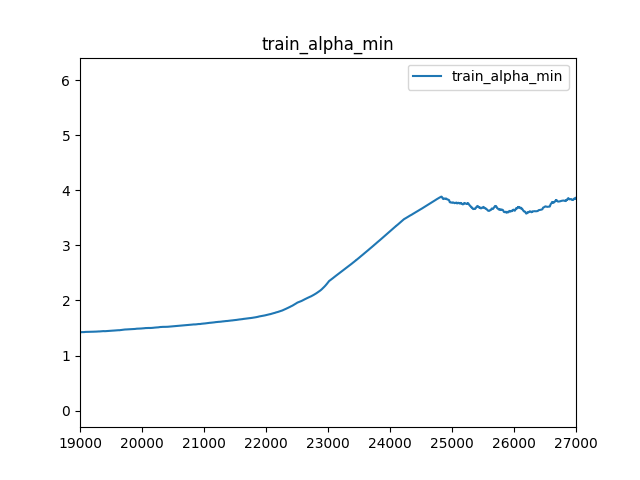

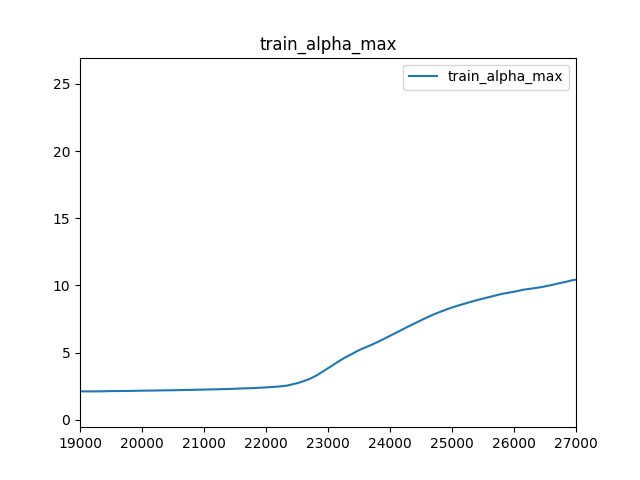

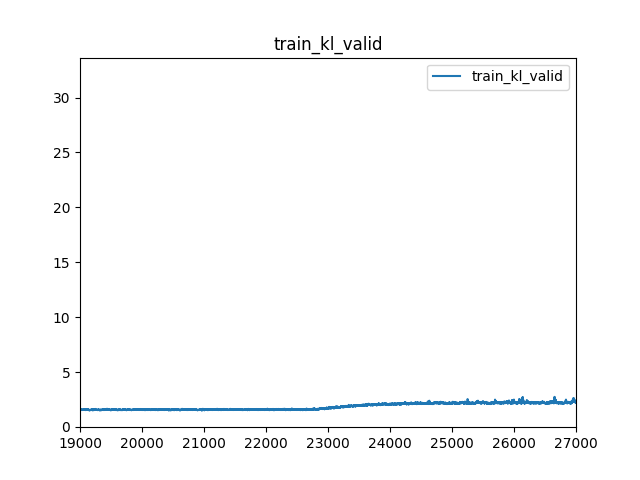

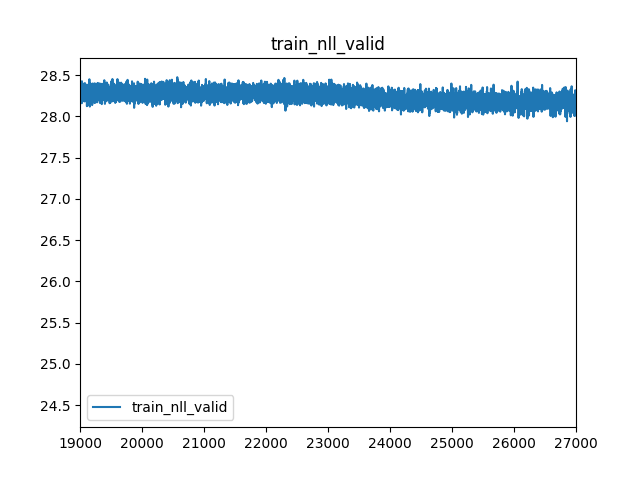

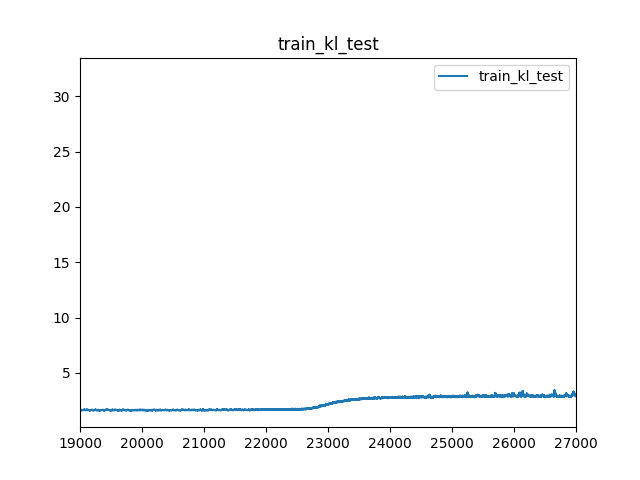

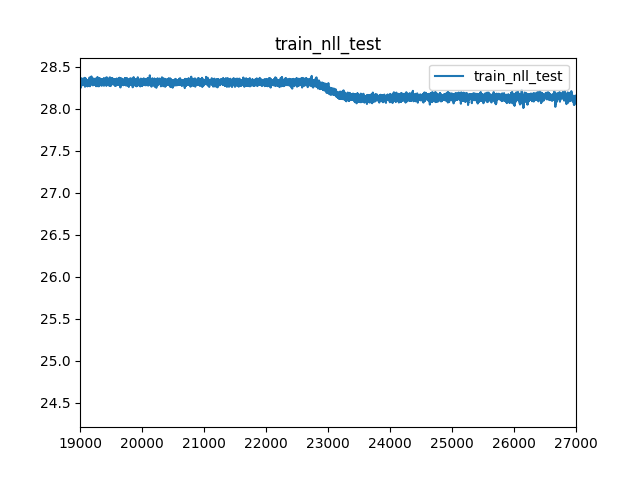

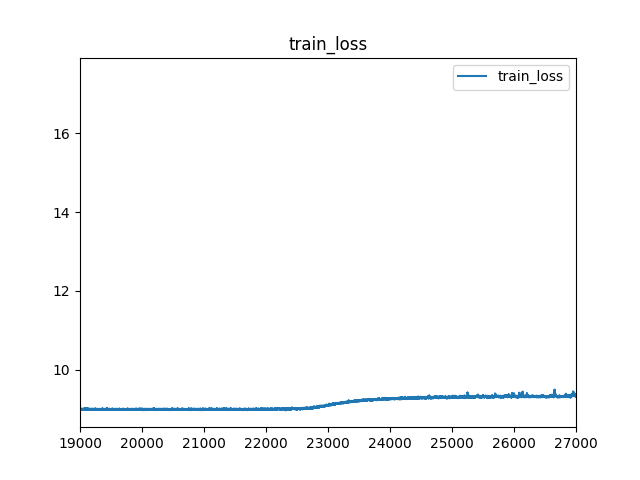

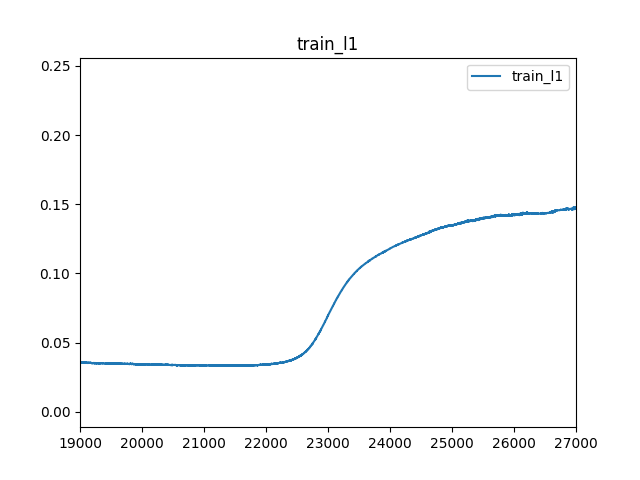

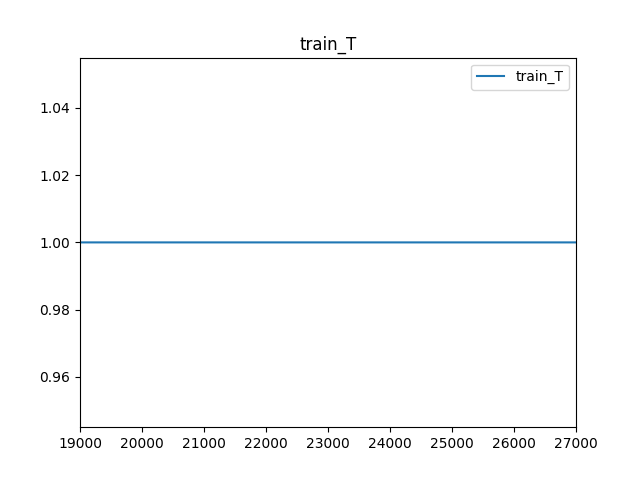

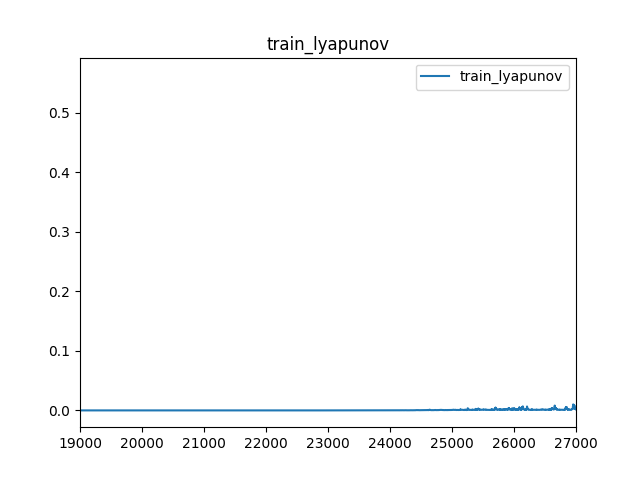

In [31]:
%matplotlib widget

variables = [
    #"train_l1",
    #"train_nll_train",
    "train_loss",
    #"train_kl_train",
]

for var in df.variable.unique():
    plot_vars_from_df(df, [var], xlim = [19000,27000], title = var)

In [18]:
import numpy as np

true_path = "ueltzhoe/bicycle/notebooks/experiments/synthetic/plots/SCALE-NOFACTORS-BENCHMARK_erdos-renyi_random-uniform_False_1024_True_0_1_0.001_60_10.0_1.0_0.0_1.0_10.0_250/last_true_beta.npy"
true_beta = np.load(os.path.join(base_path,true_path))

In [19]:
estimated_path = "ueltzhoe/bicycle/notebooks/experiments/synthetic/plots/SCALE-NOFACTORS-BENCHMARK_erdos-renyi_random-uniform_False_1024_True_0_1_0.001_60_10.0_1.0_0.0_1.0_10.0_250/last_estimated_beta_epoch16000.npy"
estimated_beta = np.load(os.path.join(base_path,estimated_path))

<AxesSubplot: title={'center': 'Ground Truth Embedded Network'}>

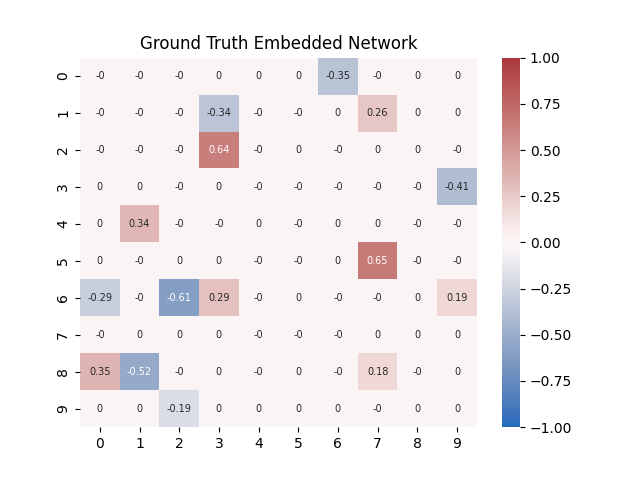

In [20]:
import seaborn as sns
plt.figure()
plt.title("Ground Truth Embedded Network")
sns.heatmap(true_beta,
            annot = True,
            annot_kws={"fontsize": 7},
            center=0,
            cmap="vlag",
            vmin = -1.0,
            vmax = 1.0)

<AxesSubplot: title={'center': 'Estimated Embedded Network'}>

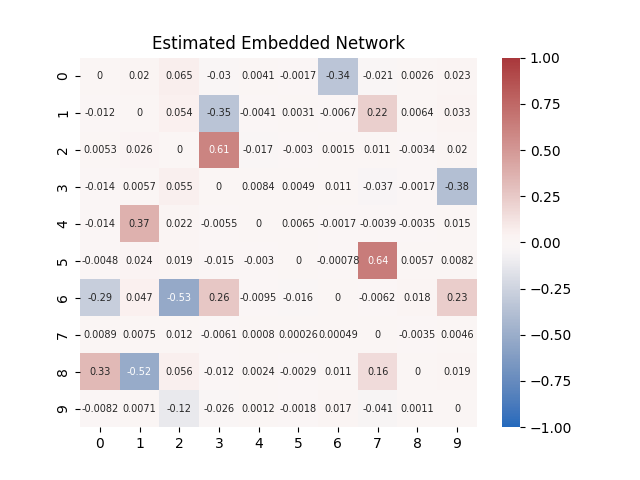

In [21]:
plt.figure()
plt.title("Estimated Embedded Network")
sns.heatmap(estimated_beta[:10,:10],
            annot = True,
            annot_kws={"fontsize": 7},
            center=0,
            cmap="vlag",
            vmin = -1.0,
            vmax = 1.0)

<AxesSubplot: title={'center': 'Estimated Whole Network'}>

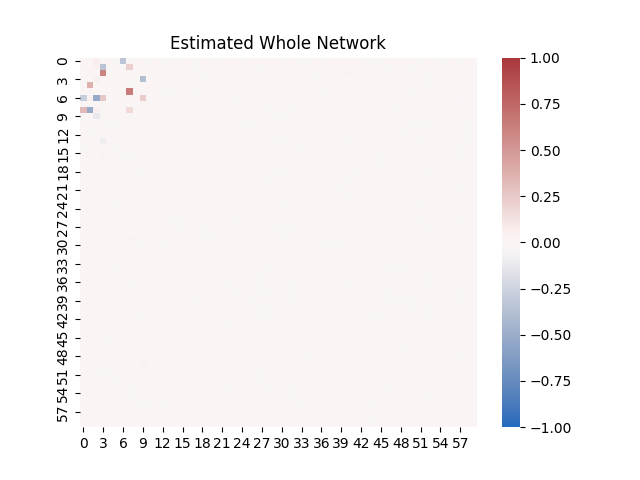

In [22]:
plt.figure()
plt.title("Estimated Whole Network")
sns.heatmap(estimated_beta[:,:],
            annot = False,
            annot_kws={"fontsize": 7},
            center=0,
            cmap="vlag",
            vmin = -1.0,
            vmax = 1.0)

In [23]:
estimated_beta_signal = estimated_beta[:10,:10]

In [24]:
np.corrcoef(true_beta.flatten(),estimated_beta_signal.flatten())

array([[1.        , 0.99090678],
       [0.99090678, 1.        ]])

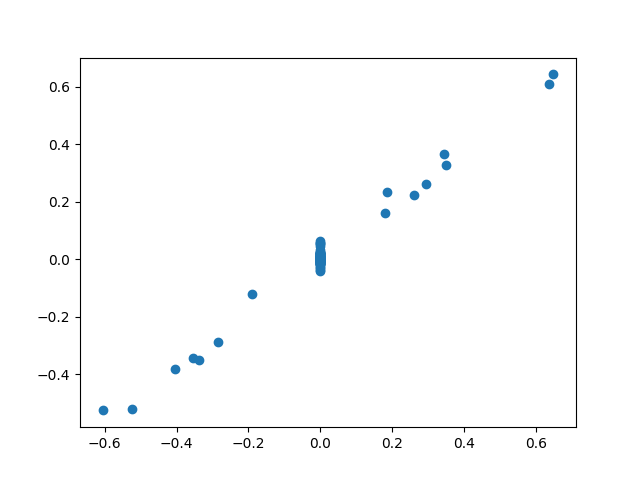

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(true_beta.flatten(),estimated_beta_signal.flatten())
plt.show()